In [5]:
!pip install firebase

In [6]:

from firebase import firebase
from IPython.display import HTML, display
from google.colab import output
# from nltk.stem import PorterStemmer
import re

#Connect to Firebase
FBconn = firebase.FirebaseApplication('https://cloudproject-1bbde-default-rtdb.firebaseio.com/', None)




In [7]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Path to your Firebase Admin SDK service account key
service_account_key = 'cloudproject-1bbde-firebase-adminsdk-849hb-47666b58c8.json'

# Initialize Firebase Admin SDK
if not firebase_admin._apps:
    cred = credentials.Certificate(service_account_key)
    firebase_admin.initialize_app(cred)

# Get a Firestore client
db = firestore.client()

In [8]:
def query_word(word):
    # Reference the collection where words are stored
    words_collection = db.collection('inverted_index')

    # Query for the document matching the given word
    doc_ref = words_collection.document(word)
    doc = doc_ref.get()

    if doc.exists:
        # print(f"Data for word '{word}': {doc.to_dict()}")
        return doc.to_dict()
    else:
        # print(f"No data found for word '{word}'.")
        return None


In [9]:
word_data = query_word('ai')

In [10]:
pip install requests beautifulsoup4

In [11]:
import requests
from bs4 import BeautifulSoup

def fetch_page(url):
  response = requests.get(url)
  if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup
  else:
    return None

In [12]:
def index_words(soup):
  index = {}
  words = re.findall(r'\w+', soup.get_text())
  for word in words:
    word = word.lower()
    if word in index:
      index[word] += 1
    else:
      index[word] = 1
  return index

In [13]:
def remove_stop_words(index):
  stop_words = {'a', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'for', 'if', 'in', 'into', 'is', 'it', 'no', 'not', 'of', 'on', 'or', 'such', 'that', 'the', 'their', 'then',
                'there', 'these', 'they', 'this', 'to', 'was', 'will', 'with'}
  # for stop_word in stop_words:
  #   print("for loop")
  #   if stop_word in index:
  #     print(stop_word)
  #     del index[stop_word]
  words = index.split()

  # Remove stop words from the list of words
  filtered_words = [word for word in words if word.lower() not in stop_words]

  # Join the filtered words back into a string
  result_str = ' '.join(filtered_words)

  # print(result_str, "after removing stopwords")

  import json
  import random
  import string

# Generate 20 random links
  random_links = ['http://example.com/' + ''.join(random.choices(string.ascii_lowercase, k=5)) for _ in range(20)]

# Create a dictionary with the links
  links_dict = {'links': random_links}

# Write the dictionary to a JSON file
  with open('random_links.json', 'w') as json_file:
    json.dump(links_dict, json_file)

  # Print the generated links
  # print(json.dumps(links_dict, indent=2))
  return result_str


In [14]:
# def apply_stemming(index):

#   stemmer = PorterStemmer()
#   stemmed_index = {}
#   for word, count in index.items():
#     stemmed_word = stemmer.stem(word)
#     if stemmed_word in stemmed_index:
#       stemmed_index[stemmed_word] += count
#     else:
#       stemmed_index[stemmed_word] = count
#   return stemmed_index

def apply_stemming(word):
  stemmer = PorterStemmer()
  stemmed_word = stemmer.stem(word)
  return stemmed_word


In [15]:
def search(query, index):
  stemmer = PorterStemmer()
  query_words = re.findall(r'\w+', query.lower())
  # print(query_words)
  results = {}
  for word in query_words:
    word = stemmer.stem(word)
    if word in index:
      results[word] = index[word]
  return results

In [16]:
def search_engine(url, query):
  soup = fetch_page(url)
  if soup is None:
    return None
  index = index_words(soup)
  index = remove_stop_words(index)
  index = apply_stemming(index)
  results = search(query, index)
  return results

In [17]:
from urllib.parse import urlparse, urljoin
from collections import deque

def extract_links_from_webpage(url):
  #send a get request to the website
  response = requests.get(url)

  soup = BeautifulSoup(response.content, 'html.parser')
  #find all anchor tags
  anchor_tags = soup.find_all('a')

  #Extract and print the href attribute of each anchor tag
  for anchor_tag in anchor_tags:
    link = anchor_tag.get('href')
    if link:
      print(link)


url = "https://api.global-search-tagging.cloud.ibm.com"
extract_links_from_webpage(url)

In [18]:
# # WE CAN DELETE THE ENTIRE ROW

# import json

# def create_links_json():
#   links_list = [
#       'https://www.ibm.com/watson?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/products/watsonx-assistant?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/watsonx?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/artificial-intelligence?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/topics/artificial-intelligence?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/docs/en/cloud-paks/cp-data/4.8.x?topic=governance-ai&mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/docs/en/wml-for-zos/enterprise/3.1.0?topic=trustworthy-ai&mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/docs/en/announcements/sw-wd-driverless-ai-5yr-pids?mhsrc=ibmsearch_a&mhq=ai',
#       'https://developer.ibm.com/technologies/artificial-intelligence/?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/training/ailearning/',
#       'https://www.ibm.com/ai-cybersecurity?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/topics/ai-ethics?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/consulting/artificial-intelligence?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/design/ai/?mhsrc=ibmsearch_a&mhq=ai',
#       'https://developer.ibm.com/series/learning-path-db2-artificial-intelligence?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/thought-leadership/institute-business-value/en-us/report/seven-bets/generative-ai?mhsrc=ibmsearch_a&mhq=ai',
#       'https://careers.ibm.com/job/19494615/ai-engineer-bangalore-in/?codes=WEB_SEARCH_NA&mhsrc=ibmsearch_a&mhq=ai',
#       'https://careers.ibm.com/job/19927582/ai-engineer-remote/?codes=WEB_SEARCH_NA&mhsrc=ibmsearch_a&mhq=ai',
#       'https://developer.ibm.com/podcasts/ai-infusion/009-ai-for-code?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/topics/artificial-intelligence?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/topics/ai-bias?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/topics/ai-model?mhsrc=ibmsearch_a&mhq=ai',
#       'https://www.ibm.com/cloud?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://myibm.ibm.com/?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/cloud/support?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://cloud.ibm.com/status?selected=status&mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/docs/en/storage-scale/5.1.1?topic=scale-cloud&mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/docs/en/announcements/revised-information-sysdig-humio-hazelcast-tubonomics-mcm?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/cloud/solutions?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/cloud-computing/us/en/assets/power-of-cloud-for-bus-model-innovation.pdf?cm_mc_sid_50200000=1497378531&cm_mc_uid=89075541499214972853041&mhsrc=ibmsearch_a&mhq=cloud',
#       'https://orders.cloud.ibm.com/internalaccount/reviewRequest?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/cloud/smartpapers/multicloud-management/?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://securityintelligence.com/security-for-the-cloud-and-on-the-cloud/?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://developer.ibm.com/events/journey-to-the-cloud-ibm-cloud-deployment-workshop-1621530066088?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://myibm.ibm.com/?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/topics/cloud-computing?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/docs/en/storage-scale/5.1.4?topic=scale-cloud&mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/docs/en/storage-scale/5.0.5?topic=scale-cloud&mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/cloud/products?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/products/hybrid-cloud-mesh?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/topics/public-cloud?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/topics/cloud-monitoring?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/cloud/open?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/topics/managed-cloud?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://www.ibm.com/topics/cloud-native?mhsrc=ibmsearch_a&mhq=cloud',
#       'https://research.ibm.com/publications?search=eyJ0eXBlIjoidGFnIiwidmFsdWUiOnsiaWQiOiJhcnRpZmljaWFsLWludGVsbGlnZW5jZSIsInRleHQiOiJBSSJ9fQ&mhsrc=ibmsearch_a&mhq=public',
#       'https://cloud.ibm.com/docs/Registry?topic=Registry-public_images&mhsrc=ibmsearch_a&mhq=public',
#       'https://cloud.ibm.com/docs/framework-financial-services?topic=framework-financial-services-vpc-architecture-connectivity-to-internet&mhsrc=ibmsearch_a&mhq=public',
#       'https://www.ibm.com/resources/publications/frequentlyAskedQuestions?mhsrc=ibmsearch_a&mhq=public',
#       'https://www.ibm.com/support/pages/node/752649?mhsrc=ibmsearch_a&mhq=public',
#       'https://cloud.ibm.com/docs/virtual-servers?topic=virtual-servers-about-public-virtual-servers&mhsrc=ibmsearch_a&mhq=public',
#       'https://www.ibm.com/products/cloud-internet-services?mhsrc=ibmsearch_a&mhq=public',
#       'https://www.ibm.com/topics/hybrid-cloud?mhsrc=ibmsearch_a&mhq=public',
#       'https://www.ibm.com/topics/open-source?mhsrc=ibmsearch_a&mhq=public',
#       'https://www.ibm.com/products/db2?mhsrc=ibmsearch_a&mhq=database',
#       'https://www.ibm.com/cloud/databases?mhsrc=ibmsearch_a&mhq=database',
#       'https://www.ibm.com/products/singlestore?mhsrc=ibmsearch_a&mhq=database',
#       'https://cloud.ibm.com/docs/discovery-data?topic=discovery-data-connector-database-cp4d&mhsrc=ibmsearch_a&mhq=database',
#       'https://www.ibm.com/docs/en/strategicsm/10.0.2?topic=cecm-database-database-connection-1&mhsrc=ibmsearch_a&mhq=database',
#       'https://www.ibm.com/docs/en/strategicsm/10.0.2?topic=management-database-database-connection&mhsrc=ibmsearch_a&mhq=database',
#       'https://cloud.ibm.com/docs/planning-analytics?topic=planning-analytics-Database_creation_resource_consumption&mhsrc=ibmsearch_a&mhq=database',
#       'https://jazz.net/help-dev/clm/topic/com.ibm.jazz.install.doc/topics/t_migrate_dbs.html?mhsrc=ibmsearch_a&mhq=database',
#       'https://cloud.ibm.com/docs/Cloudant?topic=Cloudant-database-partitioning&mhsrc=ibmsearch_a&mhq=database',
#       'https://cloud.ibm.com/docs/Db2onCloud?topic=Db2onCloud-del_db&mhsrc=ibmsearch_a&mhq=database',
#       'https://www.ibm.com/quantum?mhsrc=ibmsearch_a&mhq=computers',
#       'https://www.ibm.com/topics/computer-vision?mhsrc=ibmsearch_a&mhq=computers',
#       'https://www-store.shop.ibm.com/shops/ipe?mhsrc=ibmsearch_a&mhq=computers',
#       'https://cloud.ibm.com/docs/pattern-vpc-vsi-cross-region-resiliency?topic=pattern-vpc-vsi-cross-region-resiliency-compute-design&mhsrc=ibmsearch_a&mhq=computers',
#       'https://www.ibm.com/docs/en/spss-statistics/28.0.0?topic=reference-compute&mhsrc=ibmsearch_a&mhq=computers',
#       'https://www.ibm.com/docs/en/bask?topic=interfaces-computers&mhsrc=ibmsearch_a&mhq=computers',
#       'https://www.ibm.com/docs/en/announcements/revised-information-edge-computing-manager?mhsrc=ibmsearch_a&mhq=computers',
#       'https://www.ibm.com/docs/en/announcements/revised-information-edge-computing-manager?mhsrc=ibmsearch_a&mhq=computers',
#       'https://cloud.ibm.com/docs/cloud-infrastructure?topic=cloud-infrastructure-compute&mhsrc=ibmsearch_a&mhq=computers',
#       'https://cloud.ibm.com/docs/pattern-oracle-disaster-recovery-on-powervs?topic=pattern-oracle-disaster-recovery-on-powervs-architecture-decisions-for-compute&mhsrc=ibmsearch_a&mhq=computers',
#       'https://developer.ibm.com/videos/what-is-edge-computing?mhsrc=ibmsearch_a&mhq=computers',
#       'https://www.ibm.com/cloud/smartpapers/5g-edge-computing/?mhsrc=ibmsearch_a&mhq=computers',
#   ]

#   links_dict = {'links': links_list}
#   json_object = json.dumps(links_dict, indent=2)
#   return json_object

In [19]:
import re
import json

# Initialize a list to store the index
current_index = {}

def create_index_for_query(user_query, links_json):
  # Load the JSON object
  links_dict = json.loads(links_json)

  # Create a dictionary for the current search term

  link_array = links_dict['links']

  for link in link_array:
    # Use regular expression to find the text after the last '=' in the link
    extracted_query = link.split('=')[-1]
    if extracted_query:
      word = extracted_query.lower()

      # Check if the extracted word is in the user query
      if word in user_query.lower():

        # If the query word is not in the current index, add it with an empty list
        if word not in current_index:
          current_index[word] = []

        if link not in current_index[word]:
          # Add the link to the DocIDs array for the query term
          current_index[word].append(link)

  # Append the current index to the list
  return current_index


In [20]:
def update_index(words_list, index):
  # This function updates the index, if the user type a word that not in index, this function will update the index and add the word with the relavent links
  temp_index = []
  temp_index2 = []
  for word in words_list:
    words_list = query_word(word)
    if words_list:
      if words_list['urls'] not in temp_index:
        temp_index += words_list['urls']
        temp_index2 += words_list['urls']
        index[word] = temp_index
    temp_index = []
  return index, temp_index, temp_index2


def create_index(index):
  # This function initialize the index with some words (helps in Time complexity of searching)
  words = ["ai", "cloud", "ibm", "devops", "industry", "servers", "security", "application", "business", "databases", "financial", "public", "private"]
  buffer = []
  index, buffer, buffer = update_index(words, index)
  return index

In [21]:
pip install requests beautifulsoup4

In [22]:
#### BFS Search

# WE CAN DELETE THE ENTIRE CELL
from collections import deque

def bfs(graph, start):
    # Create a queue and enqueue the starting vertex
    queue = deque([start])
    # This set will keep track of all visited nodes to avoid revisiting them
    visited = set([start])

    while queue:
        # Dequeue a vertex from the queue
        vertex = queue.popleft()
        print(f"Visited: {vertex}")
        # If the dequeued vertex has neighbours, enqueue any that haven't been visited
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                # Add the Link to the Index...


In [23]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Initialize Firebase Admin SDK
cred = credentials.Certificate('cloudproject-1bbde-firebase-adminsdk-849hb-47666b58c8.json') # Update the path to your downloaded JSON file
# firebase_admin.initialize_app(cred)

# Get a Firestore client
db = firestore.client()

def upload_index_to_firestore(index):
    """
    Uploads or updates the index in Firestore.

    :param index: The index to upload or update, a dictionary where keys are words and values are arrays of links.
    """
    print("Updating index in Firestore...")

    # Reference the collection in Firestore
    index_collection = db.collection('index')

    for term, urls in index.items():
        # Check if the document for the term exists in Firestore
        doc_ref = index_collection.document(term)
        doc = doc_ref.get()

        if doc.exists:
            # If the document exists, update the URLs with the new values
            existing_urls = doc.to_dict().get('urls', [])
            new_urls = [url for url in urls if url not in existing_urls]
            updated_urls = existing_urls + new_urls
            doc_ref.update({'urls': updated_urls})
        else:
            # If the document doesn't exist, create a new document with the URLs
            doc_ref.set({'urls': urls})

    print("Index updated in Firestore.")

In [24]:
from firebase_admin import firestore

# Assuming you already have initialized your Firestore client
db = firestore.client()

def search_word_in_inverted_index(word):
    inverted_index_ref = db.collection('inverted_index')
    doc_ref = inverted_index_ref.document(word)
    doc = doc_ref.get()

    if doc.exists:
        # Word exists in the inverted index
        links = doc.to_dict().get('urls', [])
        print(f"Word '{word}' found in inverted index with links: {links}")
        return links
    else:
        # Word does not exist in the inverted index
        print(f"Word '{word}' not found in inverted index")
        return []


In [25]:
def extract_index_data_from_firestore():
    index_data = {}  # Initialize an empty dictionary to store index data
    index_ref = firestore.client().collection('index')
    docs = index_ref.stream()  # Retrieve all documents from the 'index' collection

    for doc in docs:
        word = doc.id  # Get the word (document ID)
        links = doc.to_dict()  # Get the links associated with the word
        index_data[word] = links  # Add the word and its links to the dictionary
    return index_data

# Extract index data from Firestore



def generate_index_table_rows(index_data):
    rows = ""
    for word, data in index_data.items():
        # Get the links associated with the word
        links = data.get('urls', [])  # If 'urls' key doesn't exist, default to an empty list

        # Remove duplicates from links
        unique_links = list(set(links))

        # Create HTML for unique links
        links_html = "<br>".join([f"<a href='{link}'>{link}</a>" for link in unique_links])

        # Create a row for each word and its associated unique links
        rows += f"<tr><td>{word}</td><td>{links_html}</td></tr>"
    return rows

In [26]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Initialize Firebase Admin SDK with credentials
cred = credentials.Certificate("cloudproject-1bbde-firebase-adminsdk-849hb-47666b58c8.json")
# firebase_admin.initialize_app(cred)

# Initialize Firestore database
db = firestore.client()

def remove_word_from_firestore(word):
    try:
        # Delete the document corresponding to the word
        db.collection('index').document(word).delete()
        print("Word removed from Firestore:", word)
    except Exception as e:
        print("Error removing word from Firestore:", e)

# Register the Python function to be invoked from JavaScript
output.register_callback('notebook.removeWord', remove_word_from_firestore)


In [27]:
def handle_new_item(new_word, new_link):
    # Update the index with the new word and link
    index = extract_index_data_from_firestore()
    if new_word in index:
        index[new_word].append(new_link)
    else:
        index[new_word] = [new_link]

    # Upload the updated index to Firestore
    upload_index_to_firestore(index)

    # Refill the table with the new index
    index_data = extract_index_data_from_firestore()
    index_table_rows = generate_index_table_rows(index_data)
    javascript_refill_table = f"""
        <script>
          updateIndexTable(`{index_table_rows}`);
        </script>
    """
    display(HTML(javascript_refill_table))

# Register the Python function to be invoked from JavaScript
output.register_callback('notebook.handleNewItem', handle_new_item)


In [28]:
def handle_new_link(selected_word, new_link):
    """
    Handles the selected word and new link.

    :param selected_word: The selected word.
    :param new_link: The new link.
    """
    print("Selected Word:", selected_word)
    print("New Link:", new_link)

    # Update Firestore database
    doc_ref = db.collection('index').document(selected_word)
    doc = doc_ref.get()

    if doc.exists:
        # If the document exists, update the URLs with the new link
        existing_urls = doc.to_dict().get('urls', [])
        updated_urls = existing_urls + [new_link]
        doc_ref.update({'urls': updated_urls})
    else:
        # If the document doesn't exist, create a new document with the new link
        doc_ref.set({'urls': [new_link]})

    # Refill the table with the updated index data
    index_data = extract_index_data_from_firestore()
    index_table_rows = generate_index_table_rows(index_data)
    javascript_refill_table = f"""
      <script>
        updateIndexTable(`{index_table_rows}`);
      </script>
    """
    display(HTML(javascript_refill_table))
# Register the Python function to be invoked from JavaScript
output.register_callback('notebook.handleNewLink', handle_new_link)



In [53]:
import matplotlib.pyplot as plt
from collections import Counter

def display_statistics(index_data=None):
    if index_data is None:
        # Fetch index data from Firestore if not provided
        index_data = extract_index_data_from_firestore()

    links = []
    for value in index_data.values():
        urls = value.get('urls', [])
        links.extend(urls)

    unique_links = list(set(links))
    link_count = {link: links.count(link) for link in unique_links}
    sorted_link_count = dict(sorted(link_count.items(), key=lambda x: x[1], reverse=True))

    labels = list(sorted_link_count.keys())
    sections = list(sorted_link_count.values())
    total_sections = sum(sections)

    # Combine single occurrences into 'Others' category if there are more than 10 labels
    if len(labels) > 10:
        single_occurrences = sum(1 for count in sections if count == 1)
        labels = labels[:10] + ['Others (each with 1 occurrence)']
        sections = sections[:10] + [single_occurrences]

    fig, ax = plt.subplots(figsize=(10, 8))
    patches, texts, _ = ax.pie(sections, labels=labels, startangle=90, autopct='%1.1f%%')
    ax.set_title('Links Occurrences')
    ax.legend(loc='best', bbox_to_anchor=(1, 1))
    ax.axis('equal')

    # Generate HTML content for the paragraph
    paragraph_html = '<p>This pie chart displays the occurrences of links indexed.</p>'

    plt.show()

    return fig, paragraph_html

output.register_callback('notebook.displayStatistics', display_statistics)


# import matplotlib.pyplot as plt
# from collections import Counter

# def display_statistics(index_data):
#     links = []
#     for value in index_data.values():
#         urls = value.get('urls', [])
#         links.extend(urls)

#     unique_links = list(set(links))
#     link_count = {link: links.count(link) for link in unique_links}
#     sorted_link_count = dict(sorted(link_count.items(), key=lambda x: x[1], reverse=True))

#     labels = list(sorted_link_count.keys())
#     sections = list(sorted_link_count.values())
#     total_sections = sum(sections)

#     # Combine single occurrences into 'Others' category if there are more than 10 labels
#     if len(labels) > 10:
#         single_occurrences = sum(1 for count in sections if count == 1)
#         labels = labels[:10] + ['Others (each with 1 occurrence)']
#         sections = sections[:10] + [single_occurrences]

#     fig, ax = plt.subplots(figsize=(10, 8))
#     patches, texts, _ = ax.pie(sections, labels=labels, startangle=90, autopct='%1.1f%%')
#     ax.set_title('Links Occurrences')
#     ax.legend(loc='best', bbox_to_anchor=(1, 1))
#     ax.axis('equal')

#     # Generate HTML content for the paragraph
#     paragraph_html = '<p>This pie chart displays the occurrences of links indexed.</p>'

#     return fig, paragraph_html

# output.register_callback('notebook.displayStatistics', display_statistics)


Updating index in Firestore...
Index updated in Firestore.


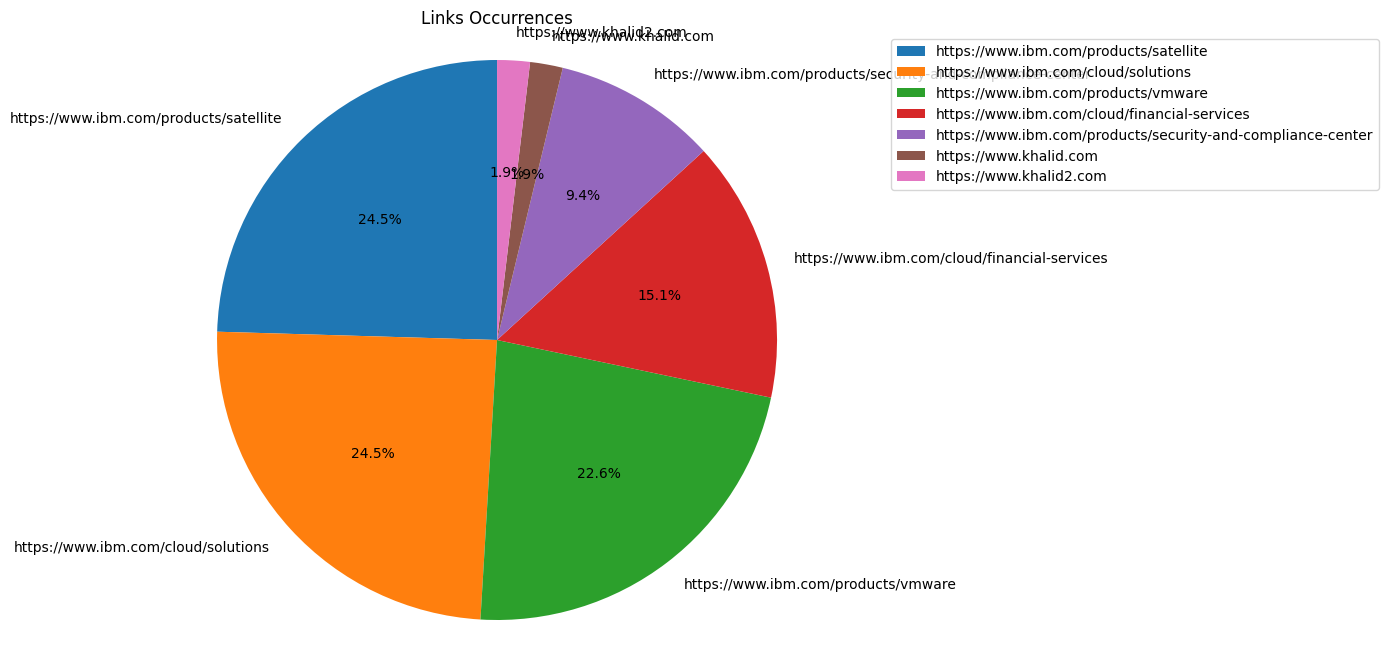

In [54]:
import json
from IPython.display import display, HTML

html = """
  <!DOCTYPE html>
  <html lang="en">
    <head>
      <meta charset="UTF-8" />
      <meta name="viewport" content="width=device-width, initial-scale=1.0" />
      <link
        rel="stylesheet"
        href="https://cdn.jsdelivr.net/npm/bootstrap@4.3.1/dist/css/bootstrap.min.css"
        integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T"
        crossorigin="anonymous"
      />

      <link rel="stylesheet" href="app.css" />
      <title>ClSearch</title>
      <style>
        body {
          background-color: #e0f2f1; /* Light blue background color */
        }

        .navbar {
          background-color: #ffffff; /* White background color for the navbar */
          box-shadow: 0 4px 6px -1px rgba(0, 0, 0, 0.1),
            0 2px 4px -1px rgba(0, 0, 0, 0.06); /* Add box shadow for a floating effect */
        }

        .navbar img {
          max-height: 40px; /* Set the maximum height for the logo */
          margin-right: 10px;
        }

        .active-cyan-2 input.form-control[type="text"]:focus:not([readonly]) {
          border-bottom: 1px solid #4dd0e1;
          box-shadow: 0 1px 0 0 #4dd0e1;
        }
        .active-cyan input.form-control[type="text"] {
          border-bottom: 1px solid #4dd0e1;
          box-shadow: 0 1px 0 0 #4dd0e1;
        }
        .active-cyan .fa,
        .active-cyan-2 .fa {
          color: #4dd0e1;
        }

        .content-section {
          display: none; /* Hide all content sections by default */
        }

        .active-content {
          display: block; /* Display the active content section */
        }

        .flex-container{
          display: flex;
          justify-content: space-between;
          align-items: flex-start;
        }

        .table-container{
          flex:1;
        }

        .button-container{
          margin-left: 20px;
        }

        .table-container{
          border: 1px solid #ccc;
          padding: 10px;
          margin: auto;
          width: 80%;
        }


        .button-container{
          border: 1px solid #ccc;
          padding: 10px;
        }

        #index-table-body tr:hover{
          cursor: pointer;
        }

        #index-table-body tr.clicked{
          background-color: rgba(0, 0, 0, 0.1);
          transition: background-color 0.3s ease;
        }

      </style>
      <script>
        function search(event) {
          event.preventDefault();
          var inputValue = document.getElementById("search-input").value;
          console.log("Search Input:", inputValue);
          google.colab.kernel.invokeFunction("notebook.query", [inputValue], {});
          //document.getElementById("search-input").value = "";
          document.getElementById("search-input").blur();
          //return false;
        }

        function handleKeyUp(event) {
          if (event.key === "Enter") {
            search(event);
          }
        }

        function showContent(sectionId) {
          // Hide all content sections
          var sections = document.getElementsByClassName("content-section");
          for (var i = 0; i < sections.length; i++) {
            sections[i].classList.remove("active-content");
          }

          // Display the selected content section
          document.getElementById(sectionId).classList.add("active-content");
        }

        function resetResultContent() {
          var resultsContent = document.getElementById("results-content");
          resultsContent.innerHTML = `<div class="text-start display-5 m-5"><span style="color: #00695c; font-style: italic">Search Results</span></div>`;
        }

        function updateResultsContent(results) {
          //Display the results in the "Search Results" section
          //var resultContent = document.getElementById("results-content");
          //resultsContent.innerHTML = results;

          // Create a new div element for the result
          var resultDiv = document.createElement("div");

          // Set styling for the result
          resultDiv.style.textAlign = "left";
          resultDiv.style.color = "red";
          resultDiv.style.marginLeft = "20px";
          resultDiv.style.fontSize = "20px"; // Adjust the font size as needed

          // Start building the HTML content
          html_content = "<ul>";

          // # Loop through the search results for "cloud" and add each as a list item
          for (const object of results) {
            html_content += `<li><a href="${object["link"]}" target="_blank">${object["title"]}</a></li>`;
            console.log(object);
          }

          // Close the list and div tag
          html_content += "</ul>";

          // Set the content of the div to the results
          resultDiv.innerHTML = html_content;

          // Get the "results-content" section
          var resultsContent = document.getElementById("results-content");

          // Append the resultDiv under the existing content
          resultsContent.appendChild(resultDiv);
        }

        function none_result_content(query) {
          var resultDiv = document.createElement("div");
          resultDiv.style.textAlign = "left";
          resultDiv.style.color = "red";
          resultDiv.style.marginLeft = "20px";
          resultDiv.style.fontSize = "20px"; // Adjust the font size as needed
          html_content = "<ul>";

          html_content += `<li>There is no search result for ${query}</li>
          `

          // Close the list and div tag
          html_content += "</ul>";

          // Set the content of the div to the results
          resultDiv.innerHTML = html_content;

          // Get the "results-content" section
          var resultsContent = document.getElementById("results-content");

          // Append the resultDiv under the existing content
          resultsContent.appendChild(resultDiv);
        }
        function displayNoResults(){
          var resultsContent = document.getElementById("results-content");
          resultsContent.innerHTML = '<div class="text-start display-5 m-5"><span style="color: #00695c; font-style: italic">No results found</span></div>';
        }

        let selectedWord = "";
        document.querySelectorAll("#index-table-body tr").forEach(row => {
          row.addEventListener("click", function() {
            document.querySelectorAll("#index-table-body tr").forEach(row => {
              row.classList.remove("clicked");
            });
            row.classList.add("clicked");
            selectedWord = row.cells[0].textContent;
          });
        });

        document.querySelector(".remove-word-btn").addEventListener("click", function(){
          if (selectedWord) {
            document.querySelectorAll("#index-table-body tr").forEach(row => {
              if (row.cells[0].textContent === selectedWord) {
                row.remove();
                google.colab.kernel.invokeFunction("notebook.removeWord", [selectedWord], {});
              }
            });
            selectedWord = "";
          }
        });



        document.getElementById('addWordBtn').addEventListener('click', function() {
          console.log('Add Word button clicked');
          document.getElementById('addWordSection').style.display = 'block';
        });

        document.getElementById('cancelBtn').addEventListener('click', function() {
          document.getElementById('addWordSection').style.display = 'none';
        });

        document.getElementById('saveWordBtn').addEventListener('click', function() {
          var newWord = document.getElementById('newWord').value;
          var newLink = document.getElementById('newLink').value;

          if (newWord && newLink) {

            google.colab.kernel.invokeFunction('notebook.handleNewItem', [newWord, newLink], {});
            document.getElementById('addWordSection').style.display = 'none';
          } else {
            alert('Please fill in both fields: New Word and New Link.');
          }
        });

        function updateIndexTable(indexTableRows) {
          var indexTableBody = document.getElementById('index-table-body');
          indexTableBody.innerHTML = indexTableRows;
        }


        let selected_word = "";
        document.querySelectorAll("#index-table-body tr").forEach(row => {
          row.addEventListener("click", function() {
            document.querySelectorAll("#index-table-body tr").forEach(row => {
              row.classList.remove("clicked");
            });
            row.classList.add("clicked");
            selected_word = row.cells[0].textContent;
          });
        });

        document.getElementById('addLinkBtn').addEventListener('click', function() {
          console.log('Add Link button clicked');
          console.log('Selected Word:', selected_word);
          document.getElementById('addLinkSection').style.display = 'block';
        });

        document.getElementById('cancelLinkBtn').addEventListener('click', function() {
          document.getElementById('addLinkSection').style.display = 'none';
        });

        document.getElementById('saveLinkBtn').addEventListener('click', function() {
          let newLink = document.getElementById('newLink-addlink').value;
          console.log("FROM SAVELINKBTN", selected_word);

          if (selected_word && newLink) {
            google.colab.kernel.invokeFunction('notebook.handleNewLink', [selected_word, newLink], {});
            console.log('Selected Word:', selected_word);
            console.log('New Link:', newLink);
            document.getElementById('addLinkSection').style.display = 'none';
          } else {
            alert('Please select a word from the table and fill in the New Link field.');
          }
        });

        function showStatistics() {
          google.colab.kernel.invokeFunction('notebook.displayStatistics', [], {});
        }

      </script>
    </head>
    <body>
      <div class="container-fluid p-0">
        <nav class="navbar navbar-expand-lg navbar-light bg-light">
          <span class="navbar-brand" href="#">
            <img src="#" alt="" />ClSearch
          </span>
          <button
            class="navbar-toggler"
            type="button"
            data-toggle="collapse"
            data-target="#navbarNavAltMarkup"
            aria-controls="navbarNavAltMarkup"
            aria-expanded="false"
            aria-label="Toggle navigation"
          >
            <span class="navbar-toggler-icon"></span>
          </button>
          <div class="collapse navbar-collapse" id="navbarNavAltMarkup">
            <div class="navbar-nav">
              <button
                class="nav-item nav-link active btn"
                onclick="showContent('home-content')"
              >
                Home <span class="sr-only">(current)</span>
              </button>
              <button
                class="nav-item nav-link btn"
                onclick="showContent('index-content')"
              >
                Index Management
              </button>
              <button
                class="nav-item nav-link btn"
                onclick="showContent('statistics-content'); showStatistics();"
              >
                Statistics
              </button>
            </div>
          </div>
          <button class="btn btn-outline-secondary">Settings</button>
        </nav>

        <!-- Home Content Section -->
        <section class="content-section active-content" id="home-content">
          <div class="text-center display-4 my-5">
            <span style="color: #00695c; font-style: italic">ClSearch</span>
          </div>
          <form
            class="d-flex justify-content-center align-items-center vh-90 md-form form-sm active-cyan-2 mt-2"
            onsubmit="search(event)"
          >
            <div style="width: 100%">
              <input
                class="form-control form-control-sm w-75"
                style="margin: auto"
                id="search-input"
                type="text"
                placeholder="Search"
                aria-label="Search"
              />
              <div id="results-content">

                <!-- Add your content specific to Index Management here -->
              </div>
            </div>
          </form>
        </section>
        <!-- Index Management Content Section -->
        <section class="content-section" id="index-content">
          <div class="text-center display-4 my-5">
            <span style="color: #00695c; font-style: italic"
              >Index Management</span
            >

          </div>
          <div class="flex-container">
            <div class="table-container">
              <table class="table">
                <thead>
                  <tr>
                    <th scope="col">Words</th>
                    <th scope="col">Links</th>
                  </tr>
                </thead>
                <tbody id="index-table-body">
                  <!-- Rows will be dynamically added here -->
                </tbody>
              </table>
            </div>
          </div>
          <div class="button-container">
            <button class="btn btn-primary" id="addWordBtn">Add Word</button>
            <div id="addWordSection" style="display: none;">
              <div class="form-group">
                <label for="newWord">New Word:</label>
                <input type="text" class="form-control" id="newWord">
              </div>
              <div class="form-group">
                <label for="newLink">New Link:</label>
                <input type="text" class="form-control" id="newLink">
              </div>
              <button id="saveWordBtn" class="btn btn-success" style="margin-bottom: 10px;">Save</button>
              <button id="cancelBtn" class="btn btn-secondary" style="margin-bottom: 10px;">Cancel</button>
            </div>

            <button class="btn btn-primary remove-word-btn">Remove Word</button>
            <button class="btn btn-primary" id="addLinkBtn">Add Link</button>
            <div id="addLinkSection" style="display: none;">
              <div class="form-group">
                <label for="newLink">New Link:</label>
                <input type="text" class="form-control" id="newLink-addlink" placeholder="Enter new link">
              </div>
              <button type="button" class="btn btn-primary" id="saveLinkBtn" style="margin-bottom: 10px;">Save</button>
              <button type="button" class="btn btn-secondary" id="cancelLinkBtn" style="margin-bottom: 10px;">Cancel</button>
            </div>
          </div>
        </section>

        <!-- Statistics Content Section -->
        <section class="content-section" id="statistics-content">
          <div class="text-center display-4 my-5">
            <span style="color: #00695c; font-style: italic">Statistics</span>
          </div>
          <p>This pie chart displays the occurrences of links indexed.</p>
          <div id="statistics-chart"></div>

        </section>
      </div>
      <script src="app.js"></script>
    </body>
  </html>

"""



def extract_link_title(link):
  # Fetch the webpage content
  response = requests.get(link)

  # Use BeautifulSoup to parse the HTML content
  soup = BeautifulSoup(response.text, 'html.parser')

  if soup.title:
    title = soup.title.text
    result = [{"title": title, "link": link}]
  else:
    title = link
    result = [{"title": link, "link": link}]

  javascript = f"""
                <script>
                  updateResultsContent({result});
                </script>
                """

  display(HTML(javascript))

  # Find the title tag and get its text
  return title


extract_link_title('https://www.ibm.com/downloads/cas/QE7BZ7A5')

index = {}
index = create_index(index)
upload_index_to_firestore(index)







index_data = extract_index_data_from_firestore()

index_table_rows = generate_index_table_rows(index_data)
html = html.replace("<!-- Rows will be dynamically added here -->", index_table_rows)

def handle_query(query):
    global user_query, index
    user_query = remove_stop_words(query)

    temp_index = []
    temp_index2 = []
    buffer1, buffer2 = [], []
    words = user_query.lower().split(" ")
    no_duplicates = list(set(words))
    index, temp_index, temp_index2 = update_index(no_duplicates, index)

    results = []


    javascript_resetConten = f"""
                <script>
                  resetResultContent();
                </script>
                """

    display(HTML(javascript_resetConten))

    # print(index)

    words_in_index = index.keys()
    # print(words_in_index)



    for link in temp_index2:
      title = extract_link_title(link)
      results.append({"title": title, "link": link})


    if len(temp_index2) == 0:
      display(HTML('<script>displayNoResults();</script>'))

    index, buffer1, buffer2 = update_index(no_duplicates, index)
    # print(index)
    if len(temp_index2) != 0:
      upload_index_to_firestore(index)
    # display(HTML(f'<script>updateIndexTable({json.dumps(index)});</script>'))




# Register the Python function to be invoked from JavaScript
output.register_callback('notebook.query', handle_query)

# Display the HTML with JavaScript code
display(HTML(html))


In [ ]:
import nltk
# importing modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
ps = PorterStemmer()

sentence = "Programmers program with programming languages"
words = word_tokenize(sentence)

for w in words:
    print(w, " : ", ps.stem(w))

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')

wnl = WordNetLemmatizer()
porter = PorterStemmer()
word = 'store'
print(wnl.lemmatize(word))